In [49]:
import rasterio
from rasterio.plot import show_hist, show
from rasterio.mask import mask
import scipy.interpolate as interpolate
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping
from scipy import stats

In [32]:
path_snow = "./data/rasters/new/SikSik_Snow.tif"
path_veg = "./data/rasters/new/SikSik_Veg.tif"
path_dem = "./data/rasters/new/SikSik_DEM.tif"
path_raster = [path_snow,path_veg,path_dem]

src_snow = rasterio.open(path_snow)
src_veg = rasterio.open(path_veg)
src_dem = rasterio.open(path_dem)

ss_shp = gpd.read_file("./data/shapefiles/SikSik.shp")

In [51]:
sd = src_snow.read()
sd = snow_depths[0]
sd = snow_depths[snow_depths > 0]


In [53]:
sd_mu = sd.mean()
sd_sig = sd.std()
sd_zscore = stats.zscore(sd)

In [59]:
scipy.stats.norm(sd_mu,sd_sig).pdf(sd[0])

1.972270518747864

In [35]:
ss_geoms = ss_shp.geometry.values
ss_geometry = ss_geoms[0]
ss_geoms = [mapping(ss_geoms[0])]

In [36]:
with rasterio.open(path_raster[0]) as src:
     out_image, out_transform = mask(src, ss_geoms, crop=True)

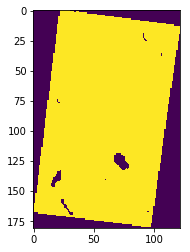

In [37]:
show(out_image)

In [38]:
no_data=src.nodata
data = out_image.data[0]
row, col = np.where(data != no_data) 
snow = np.extract(data != no_data, data)

In [41]:
from rasterio import Affine # or from affine import Affine
T1 = out_transform * Affine.translation(0.5, 0.5) # reference the pixel centre
rc2xy = lambda r, c: (c, r) * T1  

In [42]:
d = gpd.GeoDataFrame({'col':col,'row':row,'snow':snow})
d['x'] = d.apply(lambda row: rc2xy(row.row,row.col)[0], axis=1)
d['y'] = d.apply(lambda row: rc2xy(row.row,row.col)[1], axis=1)

In [43]:
# geometry
from shapely.geometry import Point
d['geometry'] =d.apply(lambda row: Point(row['x'], row['y']), axis=1)
# first 2 points
d.head(2)

,col,row,snow,x,y,geometry
0,22,0,0.498604,560102.220237,7.627944e+06,POINT (560102.2202366226 7627943.808611122)
1,23,0,0.507716,560127.220237,7.627944e+06,POINT (560127.2202366226 7627943.808611122)
